In [1]:
from shared import *
wearable_types_df = get_wearable_types_df()

## Wearables Supply

In [2]:
wearable_types_df['count']=1
column_name_mappings = {'name': 'Wearable', 'rarity': 'Rarity', 'slotNames': 'Slot(s)', 'maxQuantity': 'Total Supply', 'count': 'Total Count'}

def get_supply_by_column(column_name):
    return wearable_types_df.pivot_table(index=column_name,values='maxQuantity',aggfunc=np.sum,margins=False).reset_index()
def get_num_wearables_by_column(column_name):
    return wearable_types_df.pivot_table(index=column_name,values='count',aggfunc=np.sum,margins=False).reset_index()
def get_supply_and_count_by_column(column_name):
    return get_supply_by_column(column_name).join(get_num_wearables_by_column(column_name)['count']).rename(columns=column_name_mappings)

supply_column = column_name_mappings['maxQuantity']
rarity_column = column_name_mappings['rarity']
proportion_of_rarity_column = 'Proportion of Rarity'
slot_column = column_name_mappings['slotNames']

### Total Wearable Supply

In [3]:
total_supply_df = pd.DataFrame({column_name_mappings['maxQuantity']: [np.sum(wearable_types_df['maxQuantity'])], column_name_mappings['count']: [np.count_nonzero(wearable_types_df['count'])]})
show_itable(total_supply_df)

### Supply By Wearable

In [6]:
supply_by_name_df = get_supply_by_column('name')
show_itable_long(supply_by_name_df)

### Supply by Slot

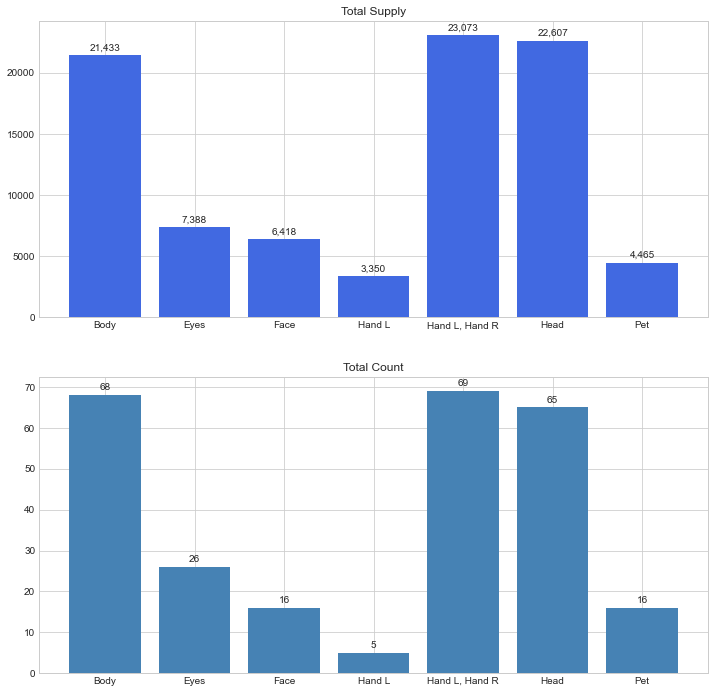

In [8]:
supply_by_slot_df = get_supply_and_count_by_column('slotNames')
metrics=[column_name_mappings['maxQuantity'], column_name_mappings['count']]
fig, axes = plt.subplots(len(metrics))
fig.set_size_inches(12,12)
for row in range(0,len(metrics)):
    m = metrics[row]
    ax = axes[row]
    color = ['royalBlue', 'steelBlue'][row]
    annotate_bars(ax.bar(supply_by_slot_df[column_name_mappings['slotNames']], supply_by_slot_df[m], color=color), ax)
    ax.set_title('{m}'.format(m=m))


### Supply by Rarity

In [9]:
supply_by_rarity_df = get_supply_and_count_by_column('rarity')
supply_by_rarity_df['Proportion of Supply'] = supply_by_rarity_df.apply(lambda row: row[supply_column] / supply_by_rarity_df[supply_column].sum() * 100, axis=1)
show_itable(supply_by_rarity_df, order=[[1, 'desc']], column_formats={'Proportion of Supply': '{:,.3f} %'}) 

### Supply by Slot & Rarity

In [10]:
supply_by_slot_rarity_df = get_supply_and_count_by_column(['slotNames', 'rarity'])
show_itable_long(supply_by_slot_rarity_df, order=[[0, 'asc'],[2, 'desc']], column_formats={'Proportion of Rarity': '{:,.1f} %'})

### Slot Proportion of Rarity

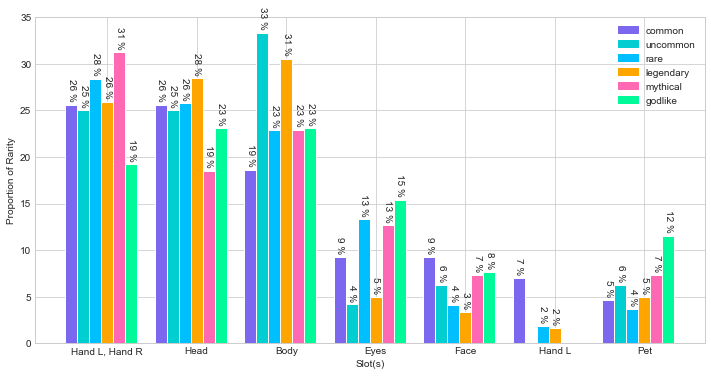

In [11]:
%%capture --no-display
# hide the warning about bar color and edge color

supply_by_slot_rarity_df[proportion_of_rarity_column] = supply_by_slot_rarity_df.apply(lambda row: row[supply_column] / supply_by_rarity_df[supply_by_rarity_df[rarity_column] == row[rarity_column]][supply_column].sum() * 100, axis=1)

proportion_of_rarity_chart = GroupedBarChart(
    supply_by_slot_rarity_df.sort_values(supply_column, ascending=False),
    x_column_name=slot_column,
    y_column_name=proportion_of_rarity_column,
    series_column_name=rarity_column,
    series_colors=rarity_color_mappings)
proportion_of_rarity_chart.annotate_bars(annotation_format='{:.0f} %', rotation=-90)
proportion_of_rarity_chart.show()